# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5','pionminus100_v1','pionminus100_v2','pionminus100_v3']
filename2 = 'electron'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"
iOption = 1

In [3]:
data1 = pd.read_csv(filepath+f'{filenames1[0]}.csv')
data1.loc[data1['phi0'] > -99, 'phi0'] = 0
for ifile in range(1,len(filenames1)):
    idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
    idata.loc[idata['phi0'] > -99, 'phi0'] = 0
    data1 = pd.concat([data1,idata], sort=False)
#data1 = pd.concat([data1,data1], sort=False)
#data1 = pd.concat([data1,data1], sort=False)
#data1 = pd.concat([data1,data1], sort=False)
#data1 = pd.concat([data1,data1], sort=False)
    
data2 = pd.read_csv(filepath+f'{filename2}.csv')
data2.loc[data2['phi0'] > -99, 'phi0'] = 1
#data2 = data2[:100000]

In [4]:
print( data1.shape, data2.shape)

(2258759, 10) (8627028, 10)


In [5]:
data = pd.concat([data1,data2], sort=False)
data = data.sample(frac = 1)
data['phi0'] = data['phi0'].astype('int32')
data['centrality'] = data['centrality'].astype('int32')
data['zvertex'] = data['zvertex'].astype('float16')
data['pt'] = data['pt'].astype('float16')
data['e/p'] = data['e/p'].astype('float16')
data['n0'] = data['n0'].astype('int32')
data['disp'] = data['disp'].astype('float16')
data['chi2'] = data['chi2'].astype('float16')
data['npe0'] = data['npe0'].astype('int32')
data['prob'] = data['prob'].astype('float16')
data.head()

,centrality,zvertex,pt,e/p,n0,disp,chi2,npe0,prob,phi0
5437832,63,6.003906,0.924805,0.992676,3,0.270752,38.968750,8,0.960449,1
237240,15,8.640625,0.443604,0.973145,2,5.367188,15.757812,3,0.000322,0
7289493,79,-6.660156,0.425293,0.915527,4,2.775391,39.593750,9,0.409668,1
5642144,14,-1.788086,0.981934,1.122070,6,1.232422,18.421875,10,0.989258,1
1155722,72,-4.714844,2.660156,0.972656,1,5.312500,13.984375,1,0.451172,1


In [6]:
if not iOption:
    data['disp2'] = data.apply(lambda row: row['disp']**2, axis=1)
    data['n0*disp'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp']), axis=1)
    data['n0*disp2'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp'])**0.5, axis=1)
    data['chi2/npe0'] = data.apply(lambda row: row['chi2']/(row['npe0']+0.001), axis=1)
    data['e/p*prob'] = data.apply(lambda row:  math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2*(row['prob']), axis=1)
    data['n0*prob'] = data.apply(lambda row: (row['n0']-2)*(row['prob']+0.001), axis=1)
    data['prob-1'] = data.apply(lambda row: 1./(1.00001-row['prob'])**0.5, axis=1)
    data['e/p*pt'] = data.apply(lambda row: ((row['pt'])**0.5)*math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
    data['n0*pt'] = data.apply(lambda row: (row['n0']-2)*(row['pt']+0.001)**0.5, axis=1)
    #data['e/p*centrality'] = data.apply(lambda row: row['e/p']*(row['centrality']+0.001)**0.5, axis=1)
    #data['n0*centrality'] = data.apply(lambda row: row['n0']*(row['centrality']+0.001)**0.5, axis=1)
    data['n0-2'] = data.apply(lambda row: (row['n0']-2)*(row['n0']), axis=1)
    data['e/p-0.8'] = data.apply(lambda row: math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
    data['pt-1'] = data.apply(lambda row: row['pt']**-1, axis=1)
    data['pt2'] = data.apply(lambda row: row['pt']**2, axis=1)
    data['centrality-2'] = data.apply(lambda row: row['centrality']**-2, axis=1)
else:
    data['disp2'] = data.apply(lambda row: row['disp']**2, axis=1)
    data['n0*disp'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp']), axis=1)
    data['n0*disp2'] = data.apply(lambda row: (row['n0']-2)/(1+row['disp'])**0.5, axis=1)
    data['chi2/npe0'] = data.apply(lambda row: row['chi2']/(row['npe0']+0.001), axis=1)
    data['e/p*prob'] = data.apply(lambda row:  math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2*(row['prob']), axis=1)
    data['n0*prob'] = data.apply(lambda row: (row['n0']-2)*(row['prob']+0.001), axis=1)
    data['prob-1'] = data.apply(lambda row: 1./(1.00001-row['prob'])**0.5, axis=1)
    data['e/p*pt'] = data.apply(lambda row: ((row['pt'])**0.5)*math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
    data['n0*pt'] = data.apply(lambda row: (row['n0']-2)*(row['pt']+0.001)**0.5, axis=1)
    #data['e/p*centrality'] = data.apply(lambda row: row['e/p']*(row['centrality']+0.001)**0.5, axis=1)
    #data['n0*centrality'] = data.apply(lambda row: row['n0']*(row['centrality']+0.001)**0.5, axis=1)
    data['n0-2'] = data.apply(lambda row: (row['n0']-2)*(row['n0']), axis=1)
    data['e/p-0.8'] = data.apply(lambda row: math.copysign(1,row['e/p']-0.8)*(row['e/p']-0.8)**2, axis=1)
    data['pt-1'] = data.apply(lambda row: row['pt']**-1, axis=1)
    data['pt2'] = data.apply(lambda row: row['pt']**2, axis=1)
    data['centrality-2'] = data.apply(lambda row: row['centrality']**-2, axis=1)
data.head()

,centrality,zvertex,pt,e/p,n0,disp,chi2,npe0,prob,phi0,...,e/p*prob,n0*prob,prob-1,e/p*pt,n0*pt,n0-2,e/p-0.8,pt-1,pt2,centrality-2
5437832,63,6.003906,0.924805,0.992676,3,0.270752,38.968750,8,0.960449,1,...,0.035656,0.961449,5.027679,0.035701,0.962187,3.0,0.037124,1.081309,0.855264,0.000252
237240,15,8.640625,0.443604,0.973145,2,5.367188,15.757812,3,0.000322,0,...,0.000010,0.000000,1.000156,0.019967,0.000000,0.0,0.029979,2.254265,0.196784,0.004444
7289493,79,-6.660156,0.425293,0.915527,4,2.775391,39.593750,9,0.409668,1,...,0.005468,0.821336,1.301512,0.008704,1.305822,8.0,0.013347,2.351320,0.180874,0.000160
5642144,14,-1.788086,0.981934,1.122070,6,1.232422,18.421875,10,0.989258,1,...,0.102615,3.961031,9.643875,0.102788,3.965720,24.0,0.103729,1.018399,0.964194,0.005102
1155722,72,-4.714844,2.660156,0.972656,1,5.312500,13.984375,1,0.451172,1,...,0.013450,-0.452172,1.349826,0.048620,-1.631305,-1.0,0.029810,0.375918,7.076431,0.000193


In [7]:
filename = 'newDB.csv'
filepath = '/home/yoren/bnl/PHENIX/ee/ML/'+filename

In [8]:
data.to_csv(filepath, index=False)

In [9]:
print(data.size, data.shape, data1.shape, data2.shape)

261258888 (10885787, 24) (2258759, 10) (8627028, 10)


In [10]:
# удалим лишние колонки
data = data.drop(columns = ['zvertex'])

In [11]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(3, 3, figsize=(15, 6))
    for i, feature in enumerate(['centrality', 'pt', 'e/p', 'n0', 'disp', 'chi2', 'npe0', 'prob', 'phi0']):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


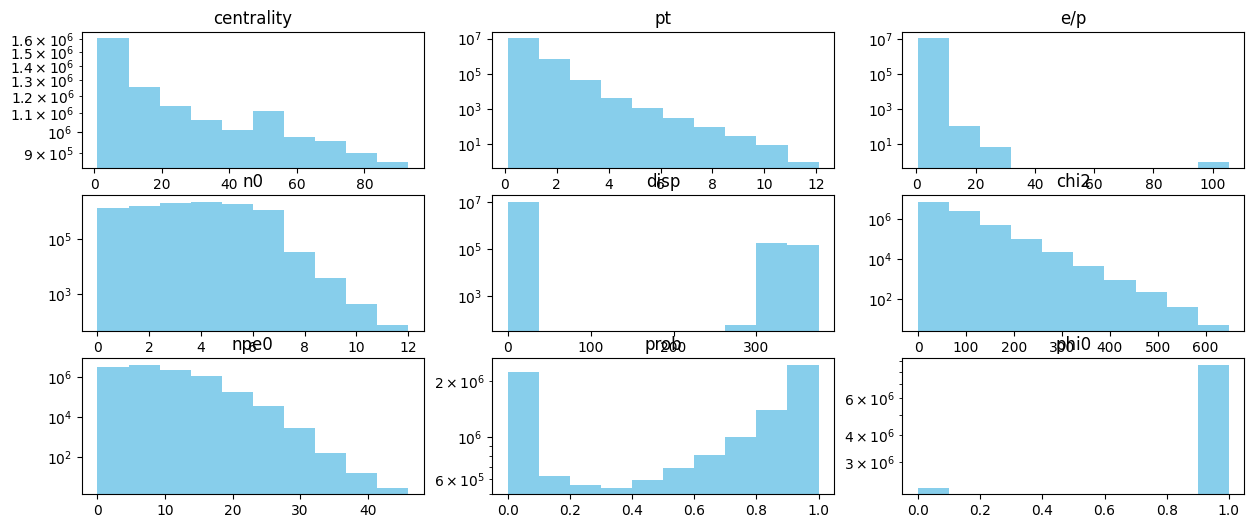

In [12]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id